# **Import libary and dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ATHTTT_AutoEncoder/KDDTrain+.txt', header=None)
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ATHTTT_AutoEncoder/KDDTest+.txt', header=None)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ATHTTT_AutoEncoder/KDDTrain+.txt', header=None)

# **Data Exploring**

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


**Check NULL Values**

In [ ]:
train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

**Check Duplicate Row**

In [ ]:
train_df.duplicated().sum()

0

**Thêm tên cho các cột**

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


**Categorical Data**

In [ ]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [ ]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
 

**Normal & Abnormal**

In [ ]:
df_normal = train_df[train_df[41] == 'normal']
df_abnormal = train_df[train_df[41] != 'normal']
print(df_normal.shape)
df_abnormal.shape

(67343, 43)


(58630, 43)

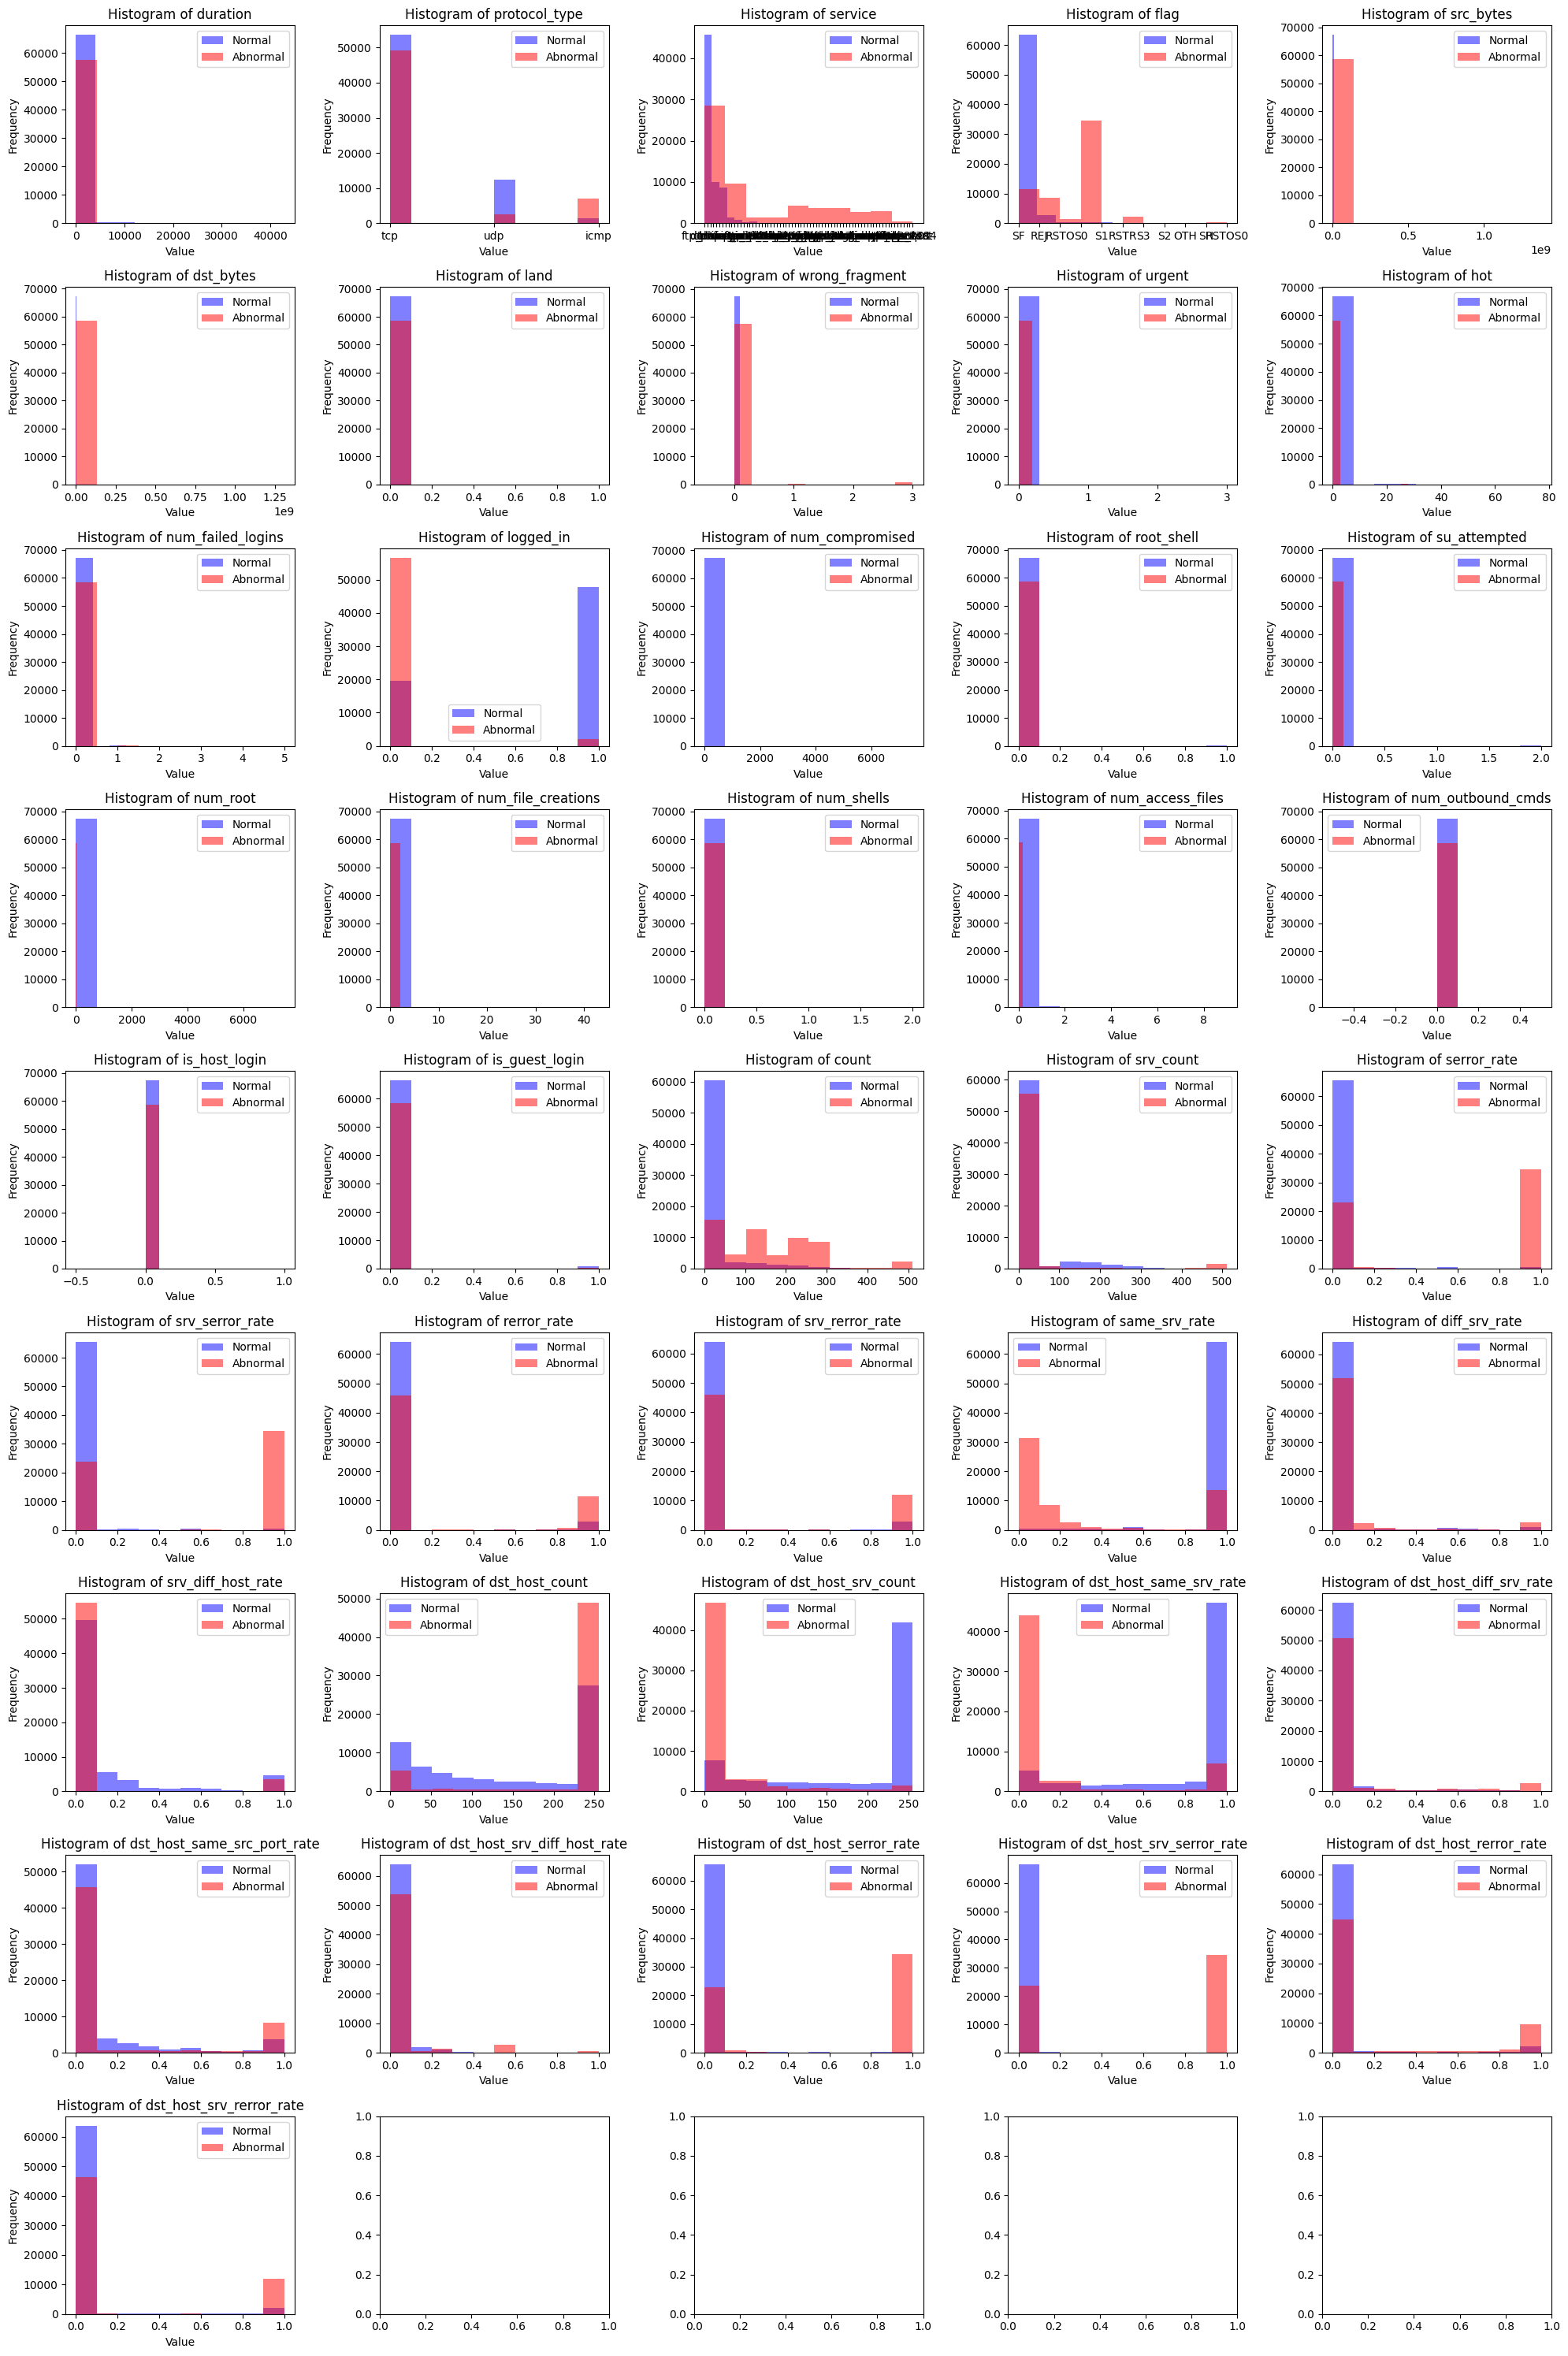

In [ ]:
# Tạo figure và hai subplot
fig, axs = plt.subplots(9, 5, figsize=(20, 30))
index = 0

for i in range(9):
  for j in range(5):
    if index == 41: break
    # Vẽ histogram cho Column1 trong normal và abnormal
    axs[i][j].hist(df_normal[index], bins=10, alpha=0.5, color='blue', label='Normal')
    axs[i][j].hist(df_abnormal[index], bins=10, alpha=0.5, color='red', label='Abnormal')
    axs[i][j].set_title('Histogram of ' + columns[index])
    axs[i][j].set_xlabel('Value')
    axs[i][j].set_ylabel('Frequency')
    axs[i][j].legend()
    index += 1

# plt.gca().set_xticklabels([])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Protocol Type**

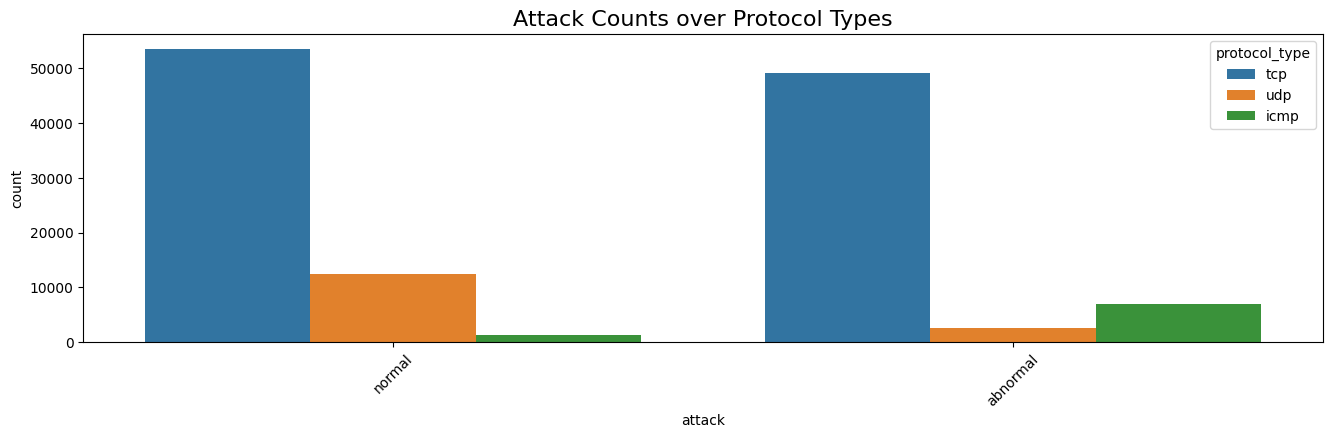

In [ ]:
#Chuyển đổi label thành normal và abnormal
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("abnormal")
df['attack'] = attack_n

#Draw
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

**Service**

<ipython-input-46-4c41fbb67129>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels


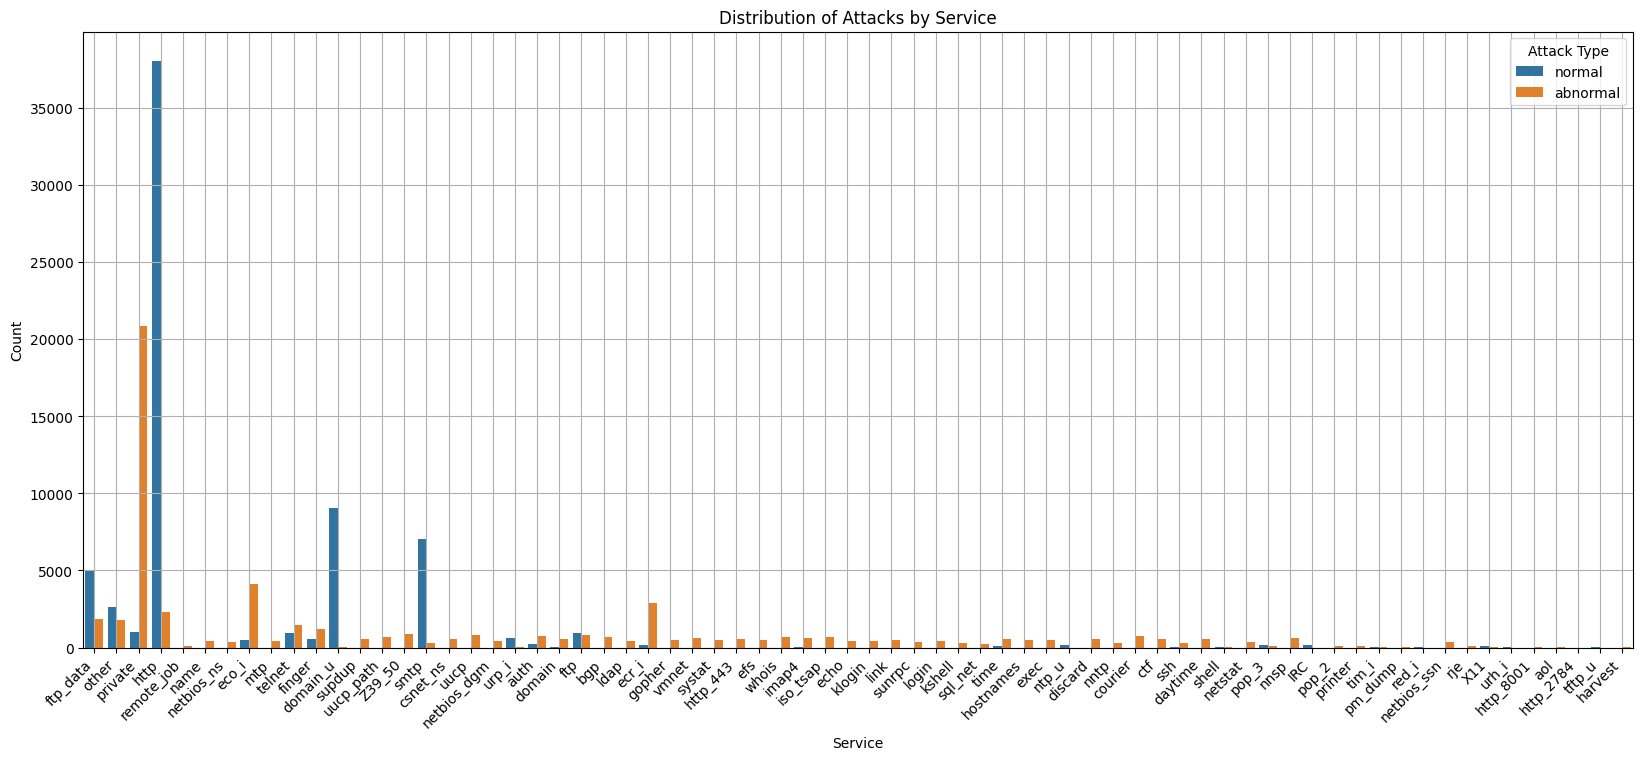

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

#Những dịch vụ phổ biến nhất cũng chính là những dịch vụ bị tấn công nhiều nhất. VD: http

# **Data Processing**




In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()

def preprocess(df, is_fit=True):
  # chuyển các datapoint có giá trị khác normal trong cột 41 về abnormal
  label = np.where(df[41] == 'normal', 'normal', 'abnormal')

  # loại bỏ cột dữ liệu không cần thiết
  df.drop([41, 42], axis=1)

  # chia dữ liệu ra số, chữ để tiện xử lý
  numerical_data = df.select_dtypes(exclude='object').values
  categorical_data = df.select_dtypes(include='object').values

  # chỉ fit với dữ liệu train
  if is_fit:
    encoder.fit(categorical_data)
  #fit là method để encoder học được các tính chất trong bộ dữ liệu
  #=> Ở đây, nó sẽ học xem có bao nhiêu hạng mục, hay một cách bản chất, phương thức này tìm ra dictionary tương ứng với bộ categorical data đưa vào
  #=> Sau đó, bộ dict này sẽ được sử dụng để chuyển đổi 1 dữ liệu hạng mục sang one-hot trong method transform

  # chuyển từ dữ liệu chữ sang onehot
  categorical_data = encoder.transform(categorical_data).toarray()

  # nối dữ liệu số và onehot lại
  data = np.concatenate([numerical_data, categorical_data], axis=1)

  # chỉ fit với dữ liệu train
  if is_fit:
    scaler.fit(data)

  # dữ liệu chuẩn hóa về dạng [0, 1]
  data = scaler.transform(data)

  return dict(data=data, label=label)

In [ ]:
# xử lý dữ liệu
train = preprocess(train_df, True)
test = preprocess(test_df, False)

In [ ]:
train['data'].shape, test['data'].shape

((125973, 146), (22544, 146))

# **Build Model**

In [ ]:
class Autoencoder(keras.Model):
  def __init__(self, input_dim):
    super(Autoencoder, self).__init__()
    self.encoder = keras.Sequential([
      keras.layers.Dense(64, activation='tanh'),
      keras.layers.Dense(32, activation='tanh'),
      keras.layers.Dense(16, activation='tanh'),
      keras.layers.Dense(8, activation='tanh')
    ])
    self.decoder = keras.Sequential([
      keras.layers.Dense(16, activation='tanh'),
      keras.layers.Dense(32, activation='tanh'),
      keras.layers.Dense(64, activation='tanh'),
      keras.layers.Dense(input_dim, activation='sigmoid'),
    ])

  def call(self, x):
    code = self.encoder(x)
    r = self.decoder(code)
    return r

  def get_reconstruction_error(self, x):
    r = self.predict(x)
    return keras.metrics.mean_squared_error(x, r)

  def predict_class(self, x, threshold):
    reconstruction_error = self.get_reconstruction_error(x)
    return np.where(reconstruction_error <= threshold, 'normal', 'abnormal')

In [ ]:
# chia dữ liệu
train_normal = train['data'][train['label'] == 'normal']
train_abnormal = train['data'][train['label'] == 'abnormal']

test_normal = test['data'][test['label'] == 'normal']
test_abnormal = test['data'][test['label'] == 'abnormal']

In [ ]:
model = Autoencoder(train_normal.shape[1])
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.MeanSquaredError()
model.compile(optimizer, loss_fn)

In [ ]:
model.fit(train_normal, train_normal, batch_size=64, epochs=100)

Epoch 1/100
1053/1053 [==============================] - 6s 3ms/step - loss: 0.0185
Epoch 2/100
1053/1053 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 3/100
1053/1053 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 4/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0034
Epoch 5/100
1053/1053 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 6/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0028
Epoch 7/100
1053/1053 [==============================] - 6s 6ms/step - loss: 0.0025
Epoch 8/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0021
Epoch 9/100
1053/1053 [==============================] - 9s 8ms/step - loss: 0.0018
Epoch 10/100
1053/1053 [==============================] - 5s 5ms/step - loss: 0.0016
Epoch 11/100
1053/1053 [==============================] - 6s 6ms/step - loss: 0.0015
Epoch 12/100
1053/1053 [==============================] - 5s 4ms/step - lo

In [ ]:
# tính độ lỗi tái tạo cho tất cả các tập dữ liệu

train_normal_re = model.get_reconstruction_error(train_normal)
train_abnormal_re = model.get_reconstruction_error(train_abnormal)

test_normal_re = model.get_reconstruction_error(test_normal)
test_abnormal_re = model.get_reconstruction_error(test_abnormal)

402/402 [==============================] - 1s 2ms/step


In [ ]:
# tìm ngưỡng (threshold) từ tập train
alpha = 0.5
threshold = np.concatenate([train_normal_re, train_abnormal_re]).mean() * alpha
print('Ngưỡng vừa tìm được từ tập train:', threshold)

Ngưỡng vừa tìm được từ tập train: 0.012891748920083046


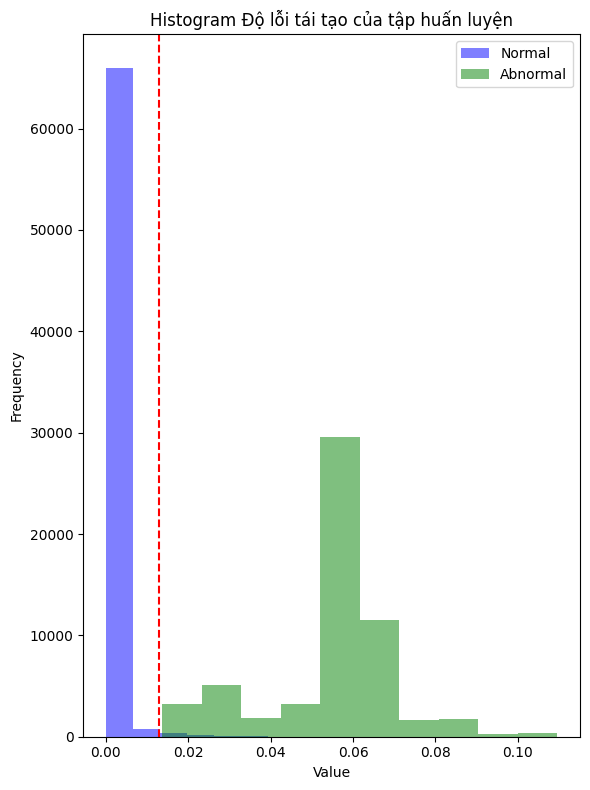

In [ ]:
# Tạo figure và hai subplot
fig, axs = plt.subplots(1, 1, figsize=(6, 8))

#Draw
axs.hist(train_normal_re, bins=10, alpha=0.5, color='blue', label='Normal')
axs.hist(train_abnormal_re, bins=10, alpha=0.5, color='green', label='Abnormal')
axs.axvline(x = threshold, color='r', linestyle='--')
axs.set_title('Histogram Độ lỗi tái tạo của tập huấn luyện')
axs.set_xlabel('Value')
axs.set_ylabel('Frequency')
axs.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# **Evaluate**

In [ ]:
train_label_predict = model.predict_class(train['data'], threshold)
print('Độ chính xác tập huấn luyện', end=': ')
accuracy_score(train['label'], train_label_predict)

3937/3937 [==============================] - 8s 2ms/step
Độ chính xác tập huấn luyện: 

0.9951894453573384

In [ ]:
test_label_predict = model.predict_class(test['data'], threshold)
print('Độ chính xác tập kiểm thử', end=': ')
accuracy_score(test['label'], test_label_predict)

705/705 [==============================] - 2s 2ms/step
Độ chính xác tập kiểm thử: 

0.9427785663591199